<a href="https://colab.research.google.com/github/imranttsia/Data-visualization/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
!pip install -q kaggle



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from google.colab import files

files.upload() #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imranttsia","key":"9988f31b3aa2eab1c389f2c12972ef31"}'}

In [5]:
!ls -lha kaggle.json



-rw-r--r-- 1 root root 66 Jul  2 15:47 kaggle.json


In [6]:
!pip install -q kaggle



In [7]:
!mkdir -p ~/.kaggle

In [8]:
!cp kaggle.json ~/.kaggle/


In [9]:
!chmod 600 /root/.kaggle/kaggle.json



In [10]:
!pwd



/content


In [11]:
!kaggle datasets list



ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                      25KB  2023-04-13 09:55:16          39480       1130  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                            6KB  2023-05-28 18:26:48           6698        171  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                22KB  2023-05-12 13:06:39           8335        173  1.0              
mohithsairamreddy/salary-data                

In [12]:
!kaggle datasets download -d arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 35.9MB/s]


In [13]:
!unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [14]:
!kaggle kernels pull mohammedzaotaiby/titanic-dataset-analysis

Source code downloaded to /content/titanic-dataset-analysis.ipynb


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')

In [19]:
df1.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

https://www.kaggle.com/code/diyorarti/prediction-of-titanic-passengers-survive-by-lr/input?select=train.csv

In [20]:
df=pd.concat([df1,df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [21]:
print(len(df2))
df2.head(1)

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<Axes: xlabel='Sex', ylabel='Survived'>

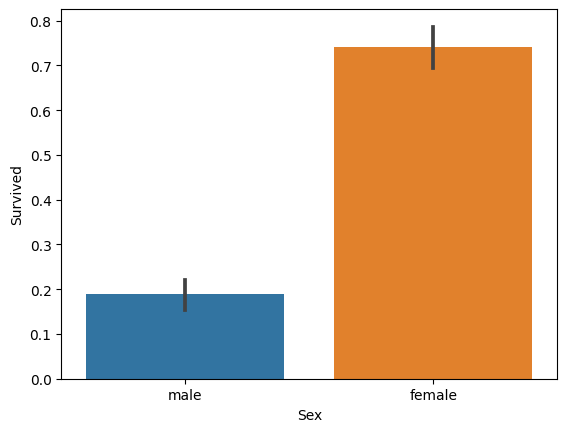

In [22]:
sns.barplot(
    data=df2,
    x="Sex", y="Survived",
)

In [23]:
df2.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

<Axes: >

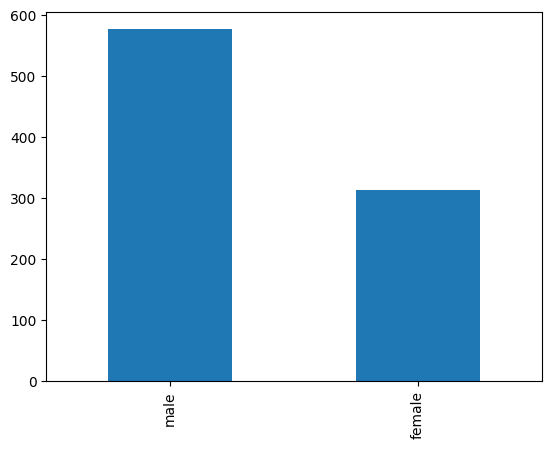

In [24]:
df2.Sex.value_counts().plot(kind='bar')


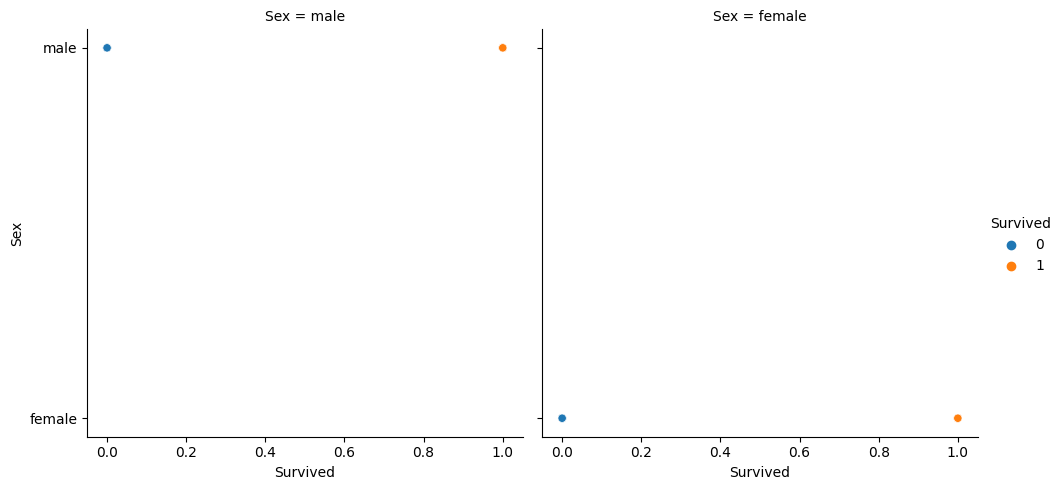

In [25]:
sns.relplot(
    data=df2,
    x="Survived", y="Sex",
    col='Sex', hue="Survived"
)

In [26]:
df2.groupby(["Sex","Survived"]).agg(['count'])


PassengerId Pclass  Name   Age SibSp Parch Ticket  Fare Cabin  \
                      count  count count count count count  count count count   
Sex    Survived                                                                 
female 0                 81     81    81    64    81    81     81    81     6   
       1                233    233   233   197   233   233    233   233    91   
male   0                468    468   468   360   468   468    468   468    62   
       1                109    109   109    93   109   109    109   109    45   

                Embarked  
                   count  
Sex    Survived           
female 0              81  
       1             231  
male   0             468  
       1             109

In [27]:
df2.groupby(["Sex","Survived"]).agg(['count'])[["PassengerId"]]


PassengerId
                      count
Sex    Survived            
female 0                 81
       1                233
male   0                468
       1                109

In [28]:
df2.groupby(["Sex","Survived"])[["PassengerId"]].agg(['count'])


PassengerId
                      count
Sex    Survived            
female 0                 81
       1                233
male   0                468
       1                109

<Axes: xlabel='Sex,Survived'>

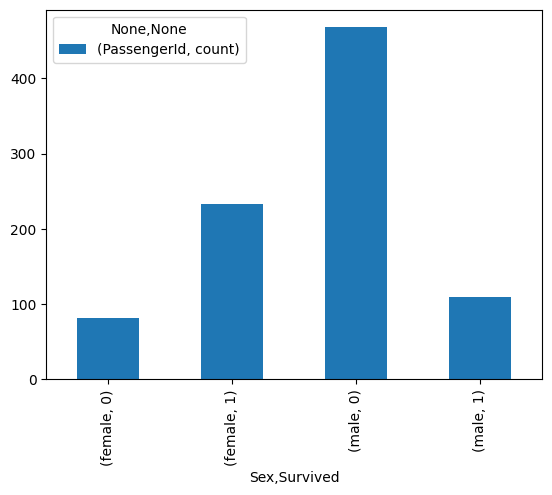

In [29]:
df2.groupby(["Sex","Survived"])[["PassengerId"]].agg(['count']).plot(kind='bar')


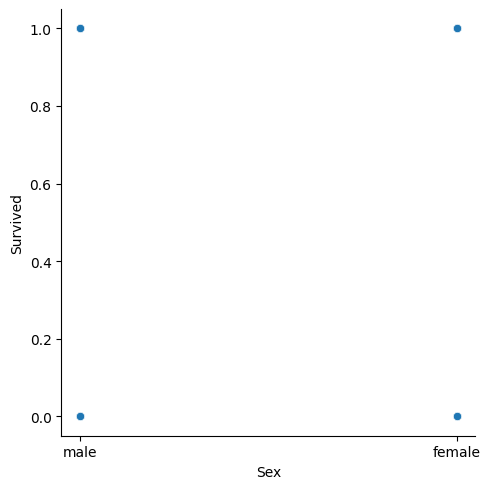

In [30]:
sns.relplot(
    data=df2,
    x = "Sex",y="Survived"
)

<Axes: xlabel='Survived', ylabel='count'>

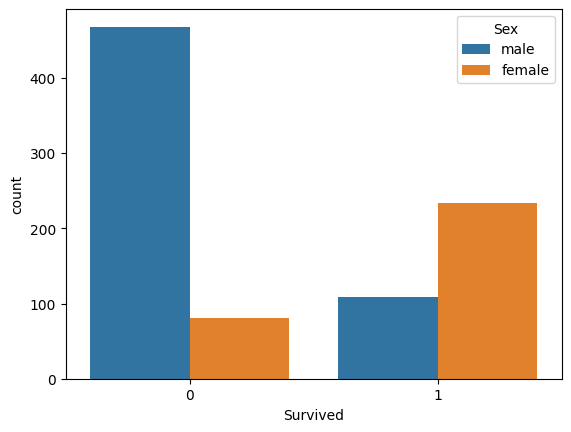

In [31]:
sns.countplot(
    data=df2,
    x = "Survived",
    hue= "Sex"
)